# Aims
* Those codes is made for check and discribes generated data

In [ ]:
import openslide
import pandas as pd
import numpy as np
import glob,os,tqdm

In [ ]:
# load data
data_path= '/root/workspace/renqian/test/deeplab'
csv_list = glob.glob(os.path.join(data_path, '*.csv'))
tables=[]
# 此处从生成的patch的csv文件中导入，如果调用extractor，则是从返回值获取即可
qbar = tqdm.tqdm(csv_list)
for csv in qbar:
    qbar.set_description(f'loading csv: {csv}')
    tables.append(pd.read_csv(csv,index_col=0,header=0))
table=pd.concat(tables).reset_index(drop=True)

In [ ]:
table.head()

In [ ]:
table.describe()

# 检查坐标有效性

In [ ]:
from wsi_ops import wsi

In [ ]:
pbar = tqdm.tqdm(glob.glob('/root/workspace/dataset/CAMELYON16/mask/*.tif'))
mask_dict={}
for gt_mask in pbar:
    _basename = os.path.basename(gt_mask).rstrip('.tif')
    pbar.set_description(f"Processing mask {gt_mask} - {_basename}" )
    mask_dict[_basename]=gt_mask

In [ ]:
mask_dict.keys()

In [ ]:
for i in table[table['label']==1].index:
    slide,x,y,label=table.loc[i]
    if wsi.read_mask(openslide.OpenSlide(mask_dict[slide]),x,y,0,128,128).sum() ==0:
        print(table.loc[i])

# 统计可知
label 中tumor点所占百分比为 0.004629

# 可视化结果

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stats={}
stats[0]=np.array([0,2,34,54])
stats[1]=np.array([1,2,3,4,5,6])
figs,axs=plt.subplots(nrows=1, ncols=2)
axs[0].boxplot([stats[0],stats[1]],labels=['nomral','tumor'])
axs[0].set_title('distribution of numbers of patches')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].text(0,0.5,s=f'normal: {stats[0].sum()}\ntumor:{stats[1].sum()}')


In [11]:
stats={}
stats[0]=np.array([0,2,34,54])
stats[1]=np.array([1,2,3,4,5,6])
figs,axs=plt.subplots(nrows=1, ncols=2)
axs[0].boxplot([stats[0],stats[1]],labels=['nomral','tumor'])
axs[0].set_title('distribution of numbers of patches')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].text(0,0.5,s=f'normal: {stats[0].sum()}\ntumor:{stats[1].sum()}')


In [13]:
# load data
data_path= '/root/workspace/renqian/test/deeplab'
csv_list = glob.glob(os.path.join(data_path, '*.csv'))
tables=[]
# 此处从生成的patch的csv文件中导入，如果调用extractor，则是从返回值获取即可
qbar = tqdm.tqdm(csv_list)
for csv in qbar:
    qbar.set_description(f'loading csv: {csv}')
    tables.append(pd.read_csv(csv,index_col=0,header=0))
table=pd.concat(tables).reset_index(drop=True)

loading csv: /root/workspace/renqian/test/deeplab/normal_150.csv: 100%|██████████| 269/269 [00:01<00:00, 231.56it/s]


In [17]:
table.head()

,slide_name,x,y,label
0,tumor_017,256.0,256.0,0
1,tumor_017,256.0,512.0,0
2,tumor_017,256.0,768.0,0
3,tumor_017,256.0,1024.0,0
4,tumor_017,256.0,1280.0,0


In [14]:
table.describe()

,x,y,label
count,953768.000000,953768.000000,953768.000000
mean,6095.415271,10969.731306,0.004629
std,4206.443487,7863.590689,0.067879
min,256.000000,256.000000,0.000000
25%,2816.000000,4352.000000,0.000000
50%,5632.000000,8704.000000,0.000000
75%,8192.000000,17408.000000,0.000000
max,27392.000000,27904.000000,1.000000


# 检查坐标有效性

In [15]:
from wsi_ops import wsi

In [27]:
pbar = tqdm.tqdm(glob.glob('/root/workspace/dataset/CAMELYON16/mask/*.tif'))
mask_dict={}
for gt_mask in pbar:
    _basename = os.path.basename(gt_mask).rstrip('.tif')
    pbar.set_description(f"Processing mask {gt_mask} - {_basename}" )
    mask_dict[_basename]=gt_mask

Processing mask /root/workspace/dataset/CAMELYON16/mask/tumor_040.tif - tumor_040: 100%|██████████| 111/111 [00:00<00:00, 2414.04it/s]


In [28]:
mask_dict.keys()

dict_keys(['tumor_043', 'tumor_033', 'tumor_046', 'tumor_002', 'tumor_029', 'tumor_098', 'tumor_069', 'tumor_095', 'tumor_011', 'tumor_015', 'tumor_025', 'tumor_028', 'tumor_037', 'tumor_044', 'tumor_089', 'tumor_052', 'tumor_061', 'tumor_059', 'tumor_068', 'tumor_038', 'tumor_104', 'tumor_109', 'tumor_102', 'tumor_111', 'tumor_072', 'tumor_009', 'tumor_003', 'tumor_065', 'tumor_006', 'tumor_082', 'tumor_026', 'tumor_010', 'tumor_005', 'tumor_055', 'tumor_054', 'tumor_048', 'tumor_017', 'tumor_087', 'tumor_096', 'tumor_064', 'tumor_100', 'tumor_085', 'tumor_086', 'tumor_106', 'tumor_063', 'tumor_073', 'tumor_074', 'tumor_091', 'tumor_034', 'tumor_107', 'tumor_080', 'tumor_036', 'tumor_001', 'tumor_103', 'tumor_021', 'tumor_045', 'tumor_041', 'tumor_007', 'tumor_060', 'tumor_016', 'tumor_023', 'tumor_056', 'tumor_042', 'tumor_088', 'tumor_022', 'tumor_081', 'tumor_058', 'tumor_024', 'tumor_031', 'tumor_094', 'tumor_012', 'tumor_004', 'tumor_078', 'tumor_027', 'tumor_093', 'tumor_013', '

In [31]:
for i in table[table['label']==1].index:
    slide,x,y,label=table.loc[i]
    if wsi.read_mask(openslide.OpenSlide(mask_dict[slide]),x,y,0,128,128).sum() ==0:
        print(table.loc[i])

slide_name    tumor_017
x                  2816
y                 17664
label                 1
Name: 1138, dtype: object
slide_name    tumor_017
x                  3328
y                 17152
label                 1
Name: 1350, dtype: object
slide_name    tumor_043
x                  7424
y                 14592
label                 1
Name: 7187, dtype: object
slide_name    tumor_043
x                  7680
y                 14336
label                 1
Name: 7293, dtype: object
slide_name    tumor_043
x                  7680
y                 14592
label                 1
Name: 7294, dtype: object
slide_name    tumor_047
x                  1792
y                 14336
label                 1
Name: 15053, dtype: object
slide_name    tumor_047
x                  1792
y                 14848
label                 1
Name: 15055, dtype: object
slide_name    tumor_047
x                  2304
y                 14336
label                 1
Name: 15259, dtype: object
slide_name    tumor_0

KeyboardInterrupt: 

# 统计可知
label 中tumor点所占百分比为 0.004629

# 可视化结果

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'normal: 90\ntumor:21')

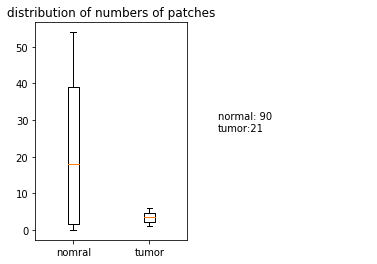

In [62]:
stats={}
stats[0]=np.array([0,2,34,54])
stats[1]=np.array([1,2,3,4,5,6])
figs,axs=plt.subplots(nrows=1, ncols=2)
axs[0].boxplot([stats[0],stats[1]],labels=['nomral','tumor'])
axs[0].set_title('distribution of numbers of patches')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].text(0,0.5,s=f'normal: {stats[0].sum()}\ntumor:{stats[1].sum()}')
